In [226]:
import pandas as pd
data = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/research/MCarloLongRuns/data/data2.csv")
print(data)
import matplotlib.pyplot as plt
import seaborn as sns




       Unnamed: 0     F      H  WShare_NT  WShare_VI  WShare_TF  SharpeNT  \
0               0  0.10  756.0  34.769446  37.727940  27.502614  0.363728   
1               1  0.10  756.0  39.152817  38.617571  22.229612  0.449156   
2               2  0.10  756.0  34.593041  35.692292  29.714666  0.366437   
3               3  0.10  756.0  28.265896  54.258294  17.475810  0.694857   
4               4  0.10  756.0  34.610598  36.393917  28.995486  0.365813   
...           ...   ...    ...        ...        ...        ...       ...   
19495       19495  1.95  504.0  31.755050  46.864907  21.380043  0.789381   
19496       19496  1.95  504.0  28.054688  49.502846  22.442466  1.222413   
19497       19497  1.95  504.0  26.166443  56.746804  17.086753  0.691226   
19498       19498  1.95  504.0  39.011562  39.237729  21.750709  0.431884   
19499       19499  1.95  504.0  31.248959  40.980677  27.770365  0.740173   

       SharpeVI  SharpeTF  DeltaNTVI  DeltaNTTF  DeltaVITF  AvgSignificance

In [227]:
def mean_without_outlier(x): # x: series
    iqr = x.quantile(.75) - x.quantile(.25)
    y = x[x.between(x.quantile(.25) - 1.5*iqr, x.quantile(.75) + 1.5*iqr)]
    return y.mean()

data['SumDelta'] = (data['DeltaVITF'] + data['DeltaNTTF'] + data['DeltaNTVI']) / 3

data['AvgSharpe'] = (data['SharpeNT'] + data['SharpeVI'] + data['SharpeTF']) / 3

data['Sharpe_excess_NT'] = data['SharpeNT'] - data['AvgSharpe']
data['Sharpe_excess_VI'] = data['SharpeVI'] - data['AvgSharpe']
data['Sharpe_excess_TF'] = data['SharpeTF'] - data['AvgSharpe']

data['DiffSharpes'] = (data['SharpeNT'] - data['SharpeTF']) ** 2 + (data['SharpeNT'] - data['SharpeVI']) ** 2 + (data['SharpeVI'] - data['SharpeTF']) ** 2 

def heat_data(original_data, column):
    data2 = original_data.copy()
    data_temp = pd.DataFrame()
    data_temp['Gen'] = data2['Unnamed: 0']
    data_temp['F'] = data2['F']
    data_temp['H'] = data2['H'].astype(int)
    data_temp['T'] = data2[column]
    data_temp2 = data_temp.groupby(['F', 'H'], as_index=False).mean()
    data_ready = data_temp2.pivot(index='H', columns='F', values = 'T')
    return data_ready

sns.set(font_scale=1) 
fontsize = 18


# How does investment change ecology dynamics?

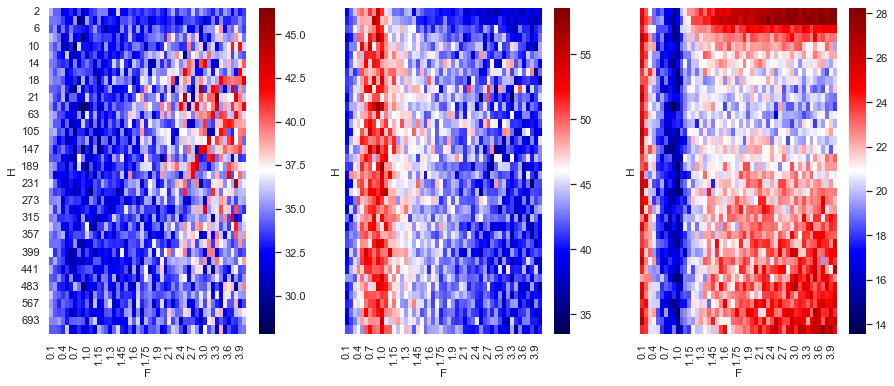

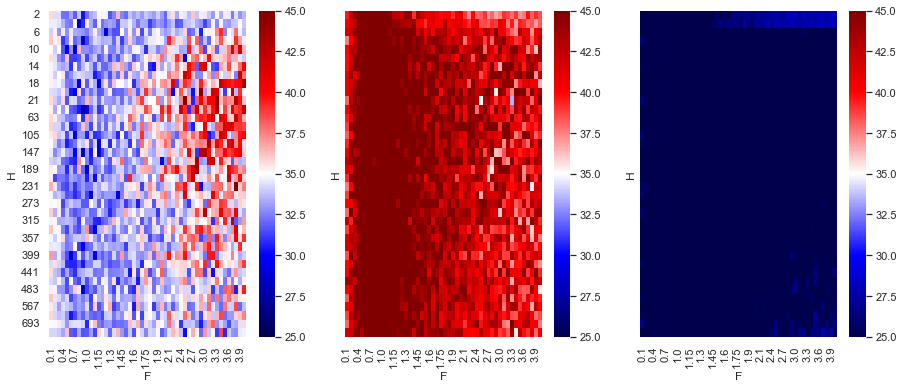

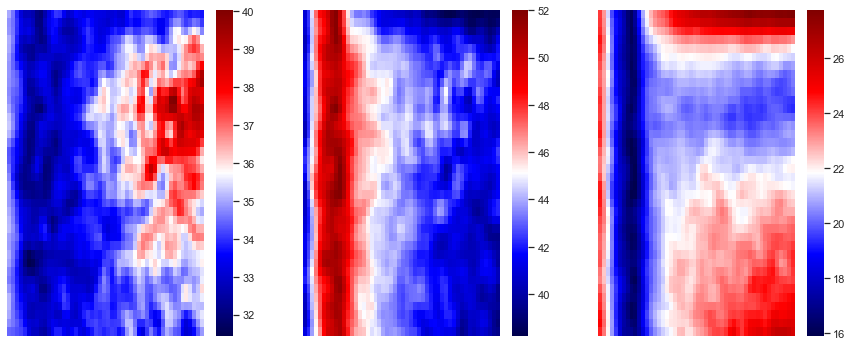

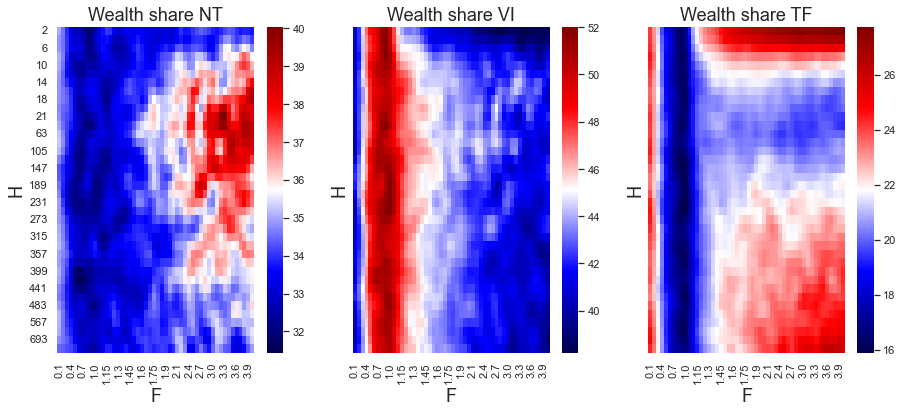

In [241]:
''' Raw data'''
# data2 = data.loc[(data['F'] != 0.0) & (data['H'] != 2.0 ) & (data['SumDelta'] >= 0.0) & (data['SumDelta'] <= 10.0)]
data2 = data.copy()
data_temp = pd.DataFrame()
data_temp['Gen'] = data2['Unnamed: 0']
data_temp['F'] = data2['F']
data_temp['H'] = data2['H'].astype(int)
data_temp['T'] = data2['WShare_NT']
# data_temp['T'] = gaussian_filter(data2['WShare_NT'], sigma=sigma)
data_temp2 = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivoted_NT = data_temp2.pivot(index='H', columns='F', values = 'T')
# data_pivoted_NT = gaussian_filter(data_pivoted_NT, sigma=1)

data_temp['T'] = data2['WShare_VI']
# data_temp['T'] = gaussian_filter(data2['WShare_VI'], sigma=sigma)
data_temp2 = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivotedVI = data_temp2.pivot(index='H', columns='F', values = 'T')
# data_pivotedVI = gaussian_filter(data_pivotedVI, sigma=1)

data_temp['T'] = data2['WShare_TF']
# data_temp['T'] = gaussian_filter(data2['WShare_TF'], sigma=sigma)
data_temp2 = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivotedTF = data_temp2.pivot(index='H', columns='F', values = 'T')
# data_pivotedTF = gaussian_filter(data_pivotedTF, sigma=1)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,6), sharey=True, sharex=True)
vmin, vmax = 0, 50 # , vmin = vmin, vmax = vmax as arg of heatmap
cmap = 'seismic'
model = sns.heatmap(data_pivoted_NT, ax=ax1, cmap = cmap)
sns.heatmap(data_pivotedVI, ax=ax2, cmap = cmap)
sns.heatmap(data_pivotedTF, ax=ax3, cmap = cmap)
plt.show()

''' With common Z axis '''
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,6), sharey=True, sharex=True)
vmin, vmax = 25, 45 # ,  as arg of heatmap
cmap = 'seismic'
sns.heatmap(data_pivoted_NT, ax=ax1, cmap = cmap, vmin = vmin, vmax = vmax)
sns.heatmap(data_pivotedVI, ax=ax2, cmap = cmap, vmin = vmin, vmax = vmax)
sns.heatmap(data_pivotedTF, ax=ax3, cmap = cmap, vmin = vmin, vmax = vmax)
plt.show()

''' With smoothing '''
from scipy.ndimage.filters import gaussian_filter
sigma = 1
# data2 = data.loc[(data['F'] != 0.0) & (data['H'] != 2.0 ) & (data['SumDelta'] >= 0.0) & (data['SumDelta'] <= 10.0)]
data2 = data.copy()
data_temp = pd.DataFrame()
data_temp['Gen'] = data2['Unnamed: 0']
data_temp['F'] = data2['F']
data_temp['H'] = data2['H'].astype(int)
data_temp['T'] = data2['WShare_NT']
data_temp2 = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivoted_NT = data_temp2.pivot(index='H', columns='F', values = 'T')
data_pivoted_NT = gaussian_filter(data_pivoted_NT, sigma=sigma)

data_temp['T'] = data2['WShare_VI']
data_temp2 = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivotedVI = data_temp2.pivot(index='H', columns='F', values = 'T')
data_pivotedVI = gaussian_filter(data_pivotedVI, sigma=sigma)
# print(data_pivotedVI)

data_temp['T'] = data2['WShare_TF']
data_temp2 = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivotedTF = data_temp2.pivot(index='H', columns='F', values = 'T')
data_pivotedTF = gaussian_filter(data_pivotedTF, sigma=sigma)

# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,6), sharey=True, sharex=True)
# vmin, vmax = 0, 50 # , vmin = vmin, vmax = vmax as arg of heatmap
# cmap = 'seismic'
# sns.heatmap(data_pivoted_NT, ax=ax1, cmap = cmap, yticklabels=False, xticklabels=False)
# sns.heatmap(data_pivotedVI, ax=ax2, cmap = cmap, yticklabels=False, xticklabels=False)
# sns.heatmap(data_pivotedTF, ax=ax3, cmap = cmap, yticklabels=False, xticklabels=False)
# plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,6), sharey=True, sharex=True)
cmap = 'seismic'
fig1 = sns.heatmap(data_pivoted_NT, ax=ax1, cmap = cmap)
fig2 = sns.heatmap(data_pivotedVI, ax=ax2, cmap = cmap)
fig3 = sns.heatmap(data_pivotedTF, ax=ax3, cmap = cmap)
ax1.set_yticklabels(model.get_yticklabels(), rotation = 0)
ax2.set_yticklabels(model.get_yticklabels(), rotation = 0)
ax3.set_yticklabels(model.get_yticklabels(), rotation = 0)
ax1.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax2.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax3.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax1.set_xlabel("F", fontsize=fontsize)
ax1.set_ylabel("H", fontsize=fontsize)
ax2.set_xlabel("F", fontsize=fontsize)
ax2.set_ylabel("H", fontsize=fontsize)
ax3.set_xlabel("F", fontsize=fontsize)
ax3.set_ylabel("H", fontsize=fontsize)
ax1.set_title("Wealth share NT", fontsize=fontsize)
ax2.set_title("Wealth share VI", fontsize=fontsize)
ax3.set_title("Wealth share TF", fontsize=fontsize)
plt.savefig('WealthShares.png', dpi=300)
plt.show()




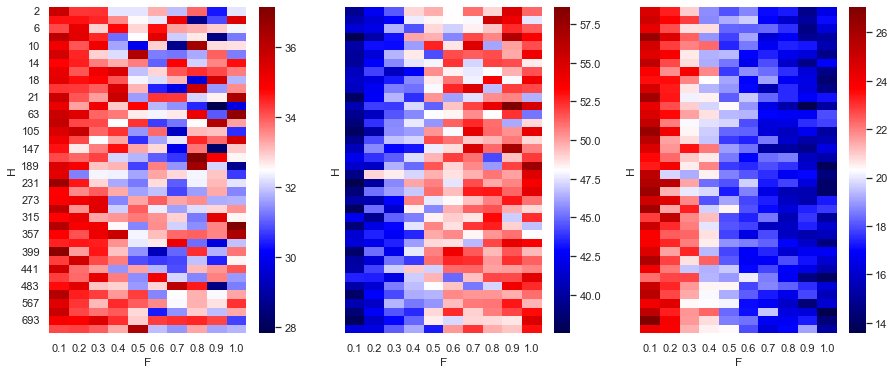

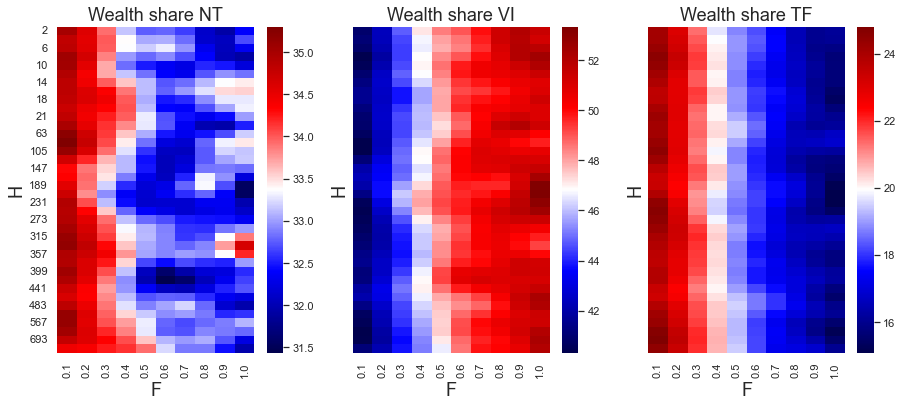

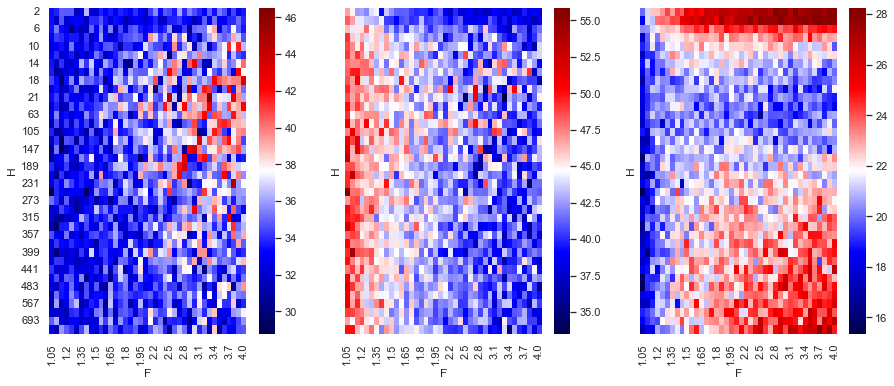

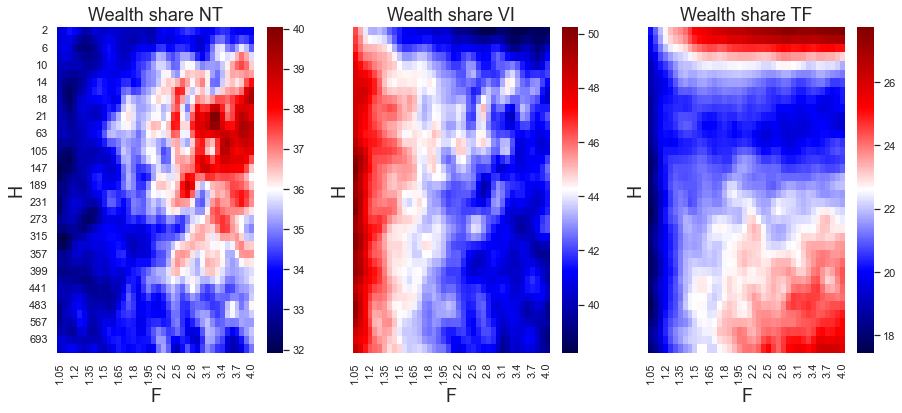

In [244]:
''' With smoothing '''
from scipy.ndimage.filters import gaussian_filter
sigma = 1
data2 = data.loc[(data['F'] <= 1.0)]

data_temp = pd.DataFrame()
data_temp['Gen'] = data2['Unnamed: 0']
data_temp['F'] = data2['F']
data_temp['H'] = data2['H'].astype(int)
data_temp['T'] = data2['WShare_NT']
# data_temp['T'] = gaussian_filter(data2['WShare_NT'], sigma=sigma)
data_temp2 = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivoted_NT = data_temp2.pivot(index='H', columns='F', values = 'T')
# data_pivoted_NT = gaussian_filter(data_pivoted_NT, sigma=1)

data_temp['T'] = data2['WShare_VI']
# data_temp['T'] = gaussian_filter(data2['WShare_VI'], sigma=sigma)
data_temp2 = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivotedVI = data_temp2.pivot(index='H', columns='F', values = 'T')
# data_pivotedVI = gaussian_filter(data_pivotedVI, sigma=1)

data_temp['T'] = data2['WShare_TF']
# data_temp['T'] = gaussian_filter(data2['WShare_TF'], sigma=sigma)
data_temp2 = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivotedTF = data_temp2.pivot(index='H', columns='F', values = 'T')
# data_pivotedTF = gaussian_filter(data_pivotedTF, sigma=1)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,6), sharey=True, sharex=True)
vmin, vmax = 0, 50 # , vmin = vmin, vmax = vmax as arg of heatmap
cmap = 'seismic'
model = sns.heatmap(data_pivoted_NT, ax=ax1, cmap = cmap)
sns.heatmap(data_pivotedVI, ax=ax2, cmap = cmap)
sns.heatmap(data_pivotedTF, ax=ax3, cmap = cmap)
plt.show()


data_temp = pd.DataFrame()
data_temp['Gen'] = data2['Unnamed: 0']
data_temp['F'] = data2['F']
data_temp['H'] = data2['H'].astype(int)
data_temp['T'] = data2['WShare_NT']
data_temp2 = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivoted_NT = data_temp2.pivot(index='H', columns='F', values = 'T')
data_pivoted_NT = gaussian_filter(data_pivoted_NT, sigma=sigma)

data_temp['T'] = data2['WShare_VI']
data_temp2 = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivotedVI = data_temp2.pivot(index='H', columns='F', values = 'T')
data_pivotedVI = gaussian_filter(data_pivotedVI, sigma=sigma)

data_temp['T'] = data2['WShare_TF']
data_temp2 = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivotedTF = data_temp2.pivot(index='H', columns='F', values = 'T')
data_pivotedTF = gaussian_filter(data_pivotedTF, sigma=sigma)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,6), sharey=True, sharex=True)
cmap = 'seismic'
fig1 = sns.heatmap(data_pivoted_NT, ax=ax1, cmap = cmap)
fig2 = sns.heatmap(data_pivotedVI, ax=ax2, cmap = cmap)
fig3 = sns.heatmap(data_pivotedTF, ax=ax3, cmap = cmap)
ax1.set_yticklabels(model.get_yticklabels(), rotation = 0)
ax2.set_yticklabels(model.get_yticklabels(), rotation = 0)
ax3.set_yticklabels(model.get_yticklabels(), rotation = 0)
ax1.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax2.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax3.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax1.set_xlabel("F", fontsize=fontsize)
ax1.set_ylabel("H", fontsize=fontsize)
ax2.set_xlabel("F", fontsize=fontsize)
ax2.set_ylabel("H", fontsize=fontsize)
ax3.set_xlabel("F", fontsize=fontsize)
ax3.set_ylabel("H", fontsize=fontsize)
ax1.set_title("Wealth share NT", fontsize=fontsize)
ax2.set_title("Wealth share VI", fontsize=fontsize)
ax3.set_title("Wealth share TF", fontsize=fontsize)
plt.savefig('WealthShares_sub1.png', dpi=300)
plt.show()

''' With smoothing '''
from scipy.ndimage.filters import gaussian_filter
sigma = 1
data2 = data.loc[(data['F'] > 1.0)]

data_temp = pd.DataFrame()
data_temp['Gen'] = data2['Unnamed: 0']
data_temp['F'] = data2['F']
data_temp['H'] = data2['H'].astype(int)
data_temp['T'] = data2['WShare_NT']
# data_temp['T'] = gaussian_filter(data2['WShare_NT'], sigma=sigma)
data_temp2 = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivoted_NT = data_temp2.pivot(index='H', columns='F', values = 'T')
# data_pivoted_NT = gaussian_filter(data_pivoted_NT, sigma=1)

data_temp['T'] = data2['WShare_VI']
# data_temp['T'] = gaussian_filter(data2['WShare_VI'], sigma=sigma)
data_temp2 = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivotedVI = data_temp2.pivot(index='H', columns='F', values = 'T')
# data_pivotedVI = gaussian_filter(data_pivotedVI, sigma=1)

data_temp['T'] = data2['WShare_TF']
# data_temp['T'] = gaussian_filter(data2['WShare_TF'], sigma=sigma)
data_temp2 = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivotedTF = data_temp2.pivot(index='H', columns='F', values = 'T')
# data_pivotedTF = gaussian_filter(data_pivotedTF, sigma=1)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,6), sharey=True, sharex=True)
vmin, vmax = 0, 50 # , vmin = vmin, vmax = vmax as arg of heatmap
cmap = 'seismic'
model = sns.heatmap(data_pivoted_NT, ax=ax1, cmap = cmap)
sns.heatmap(data_pivotedVI, ax=ax2, cmap = cmap)
sns.heatmap(data_pivotedTF, ax=ax3, cmap = cmap)
plt.show()

data_temp = pd.DataFrame()
data_temp['Gen'] = data2['Unnamed: 0']
data_temp['F'] = data2['F']
data_temp['H'] = data2['H'].astype(int)
data_temp['T'] = data2['WShare_NT']
data_temp2 = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivoted_NT = data_temp2.pivot(index='H', columns='F', values = 'T')
data_pivoted_NT = gaussian_filter(data_pivoted_NT, sigma=sigma)
data_temp['T'] = data2['WShare_VI']
data_temp2 = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivotedVI = data_temp2.pivot(index='H', columns='F', values = 'T')
data_pivotedVI = gaussian_filter(data_pivotedVI, sigma=sigma)
data_temp['T'] = data2['WShare_TF']
data_temp2 = data_temp.groupby(['F', 'H'], as_index=False).mean()
data_pivotedTF = data_temp2.pivot(index='H', columns='F', values = 'T')
data_pivotedTF = gaussian_filter(data_pivotedTF, sigma=sigma)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,6), sharey=True, sharex=True)
cmap = 'seismic'
fig1 = sns.heatmap(data_pivoted_NT, ax=ax1, cmap = cmap)
fig2 = sns.heatmap(data_pivotedVI, ax=ax2, cmap = cmap)
fig3 = sns.heatmap(data_pivotedTF, ax=ax3, cmap = cmap)
ax1.set_yticklabels(model.get_yticklabels(), rotation = 0)
ax2.set_yticklabels(model.get_yticklabels(), rotation = 0)
ax3.set_yticklabels(model.get_yticklabels(), rotation = 0)
ax1.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax2.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax3.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax1.set_xlabel("F", fontsize=fontsize)
ax1.set_ylabel("H", fontsize=fontsize)
ax2.set_xlabel("F", fontsize=fontsize)
ax2.set_ylabel("H", fontsize=fontsize)
ax3.set_xlabel("F", fontsize=fontsize)
ax3.set_ylabel("H", fontsize=fontsize)
ax1.set_title("Wealth share NT", fontsize=fontsize)
ax2.set_title("Wealth share VI", fontsize=fontsize)
ax3.set_title("Wealth share TF", fontsize=fontsize)
plt.savefig('WealthShares_sup1.png', dpi=300)
plt.show()

# Change of statistical significance

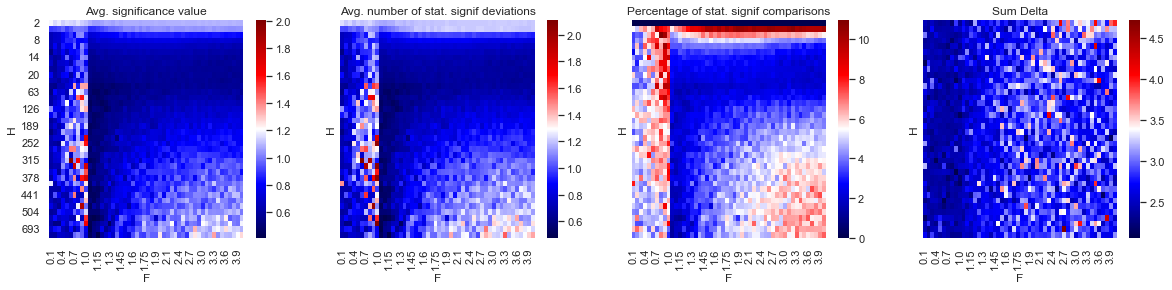

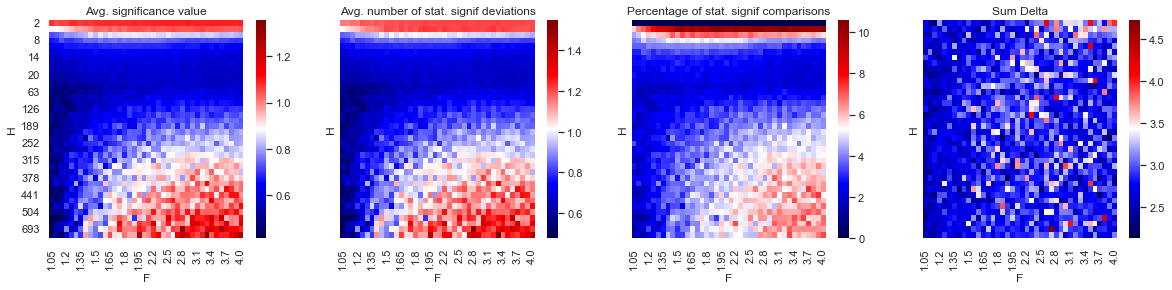

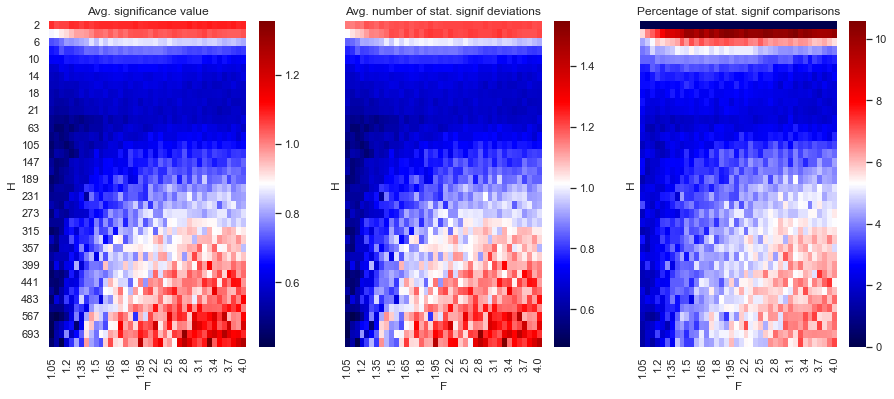

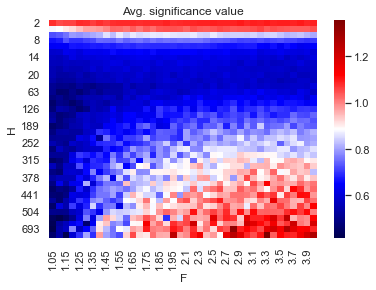

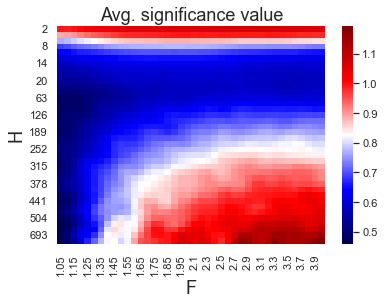

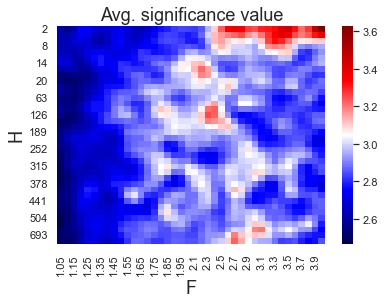

In [256]:
data_r2 = data.loc[(data['SumDelta'] < 10) & (data['SumDelta'] > 0)]
data_signif = heat_data(data_r2, 'AvgSignificance')
data_number = heat_data(data_r2, 'AvgNumberDev')
data_pers = heat_data(data_r2, 'PerSignif')
data_delta = heat_data(data_r2, 'SumDelta')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20,4), sharey=True, sharex=True)
cmap = 'seismic'
sns.heatmap(data_signif, ax=ax1, cmap = cmap)
sns.heatmap(data_number, ax=ax2, cmap = cmap)
sns.heatmap(data_pers, ax=ax3, cmap = cmap)
sns.heatmap(data_delta, ax=ax4, cmap = cmap)
ax1.set_xlabel("F")
ax1.set_ylabel("H")
ax2.set_xlabel("F")
ax2.set_ylabel("H")
ax3.set_xlabel("F")
ax3.set_ylabel("H")
ax4.set_xlabel("F")
ax4.set_ylabel("H")
ax1.set_title("Avg. significance value")
ax2.set_title("Avg. number of stat. signif deviations")
ax3.set_title('Percentage of stat. signif comparisons')
ax4.set_title("Sum Delta")
plt.show()
data_r2 = data.loc[(data['SumDelta'] < 10) & (data['SumDelta'] > 0) & (data['F'] > 1.0)]
data_signif = heat_data(data_r2, 'AvgSignificance')
data_number = heat_data(data_r2, 'AvgNumberDev')
data_pers = heat_data(data_r2, 'PerSignif')
data_delta = heat_data(data_r2, 'SumDelta')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20,4), sharey=True, sharex=True)
cmap = 'seismic'
sns.heatmap(data_signif, ax=ax1, cmap = cmap)
sns.heatmap(data_number, ax=ax2, cmap = cmap)
sns.heatmap(data_pers, ax=ax3, cmap = cmap)
sns.heatmap(data_delta, ax=ax4, cmap = cmap)
ax1.set_xlabel("F")
ax1.set_ylabel("H")
ax2.set_xlabel("F")
ax2.set_ylabel("H")
ax3.set_xlabel("F")
ax3.set_ylabel("H")
ax4.set_xlabel("F")
ax4.set_ylabel("H")
ax1.set_title("Avg. significance value")
ax2.set_title("Avg. number of stat. signif deviations")
ax3.set_title('Percentage of stat. signif comparisons')
ax4.set_title("Sum Delta")
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,6), sharey=True, sharex=True)
cmap = 'seismic'
model = sns.heatmap(data_signif, ax=ax1, cmap = cmap)
sns.heatmap(data_number, ax=ax2, cmap = cmap)
sns.heatmap(data_pers, ax=ax3, cmap = cmap)
ax1.set_xlabel("F")
ax1.set_ylabel("H")
ax2.set_xlabel("F")
ax2.set_ylabel("H")
ax3.set_xlabel("F")
ax3.set_ylabel("H")
ax1.set_title("Avg. significance value")
ax2.set_title("Avg. number of stat. signif deviations")
ax3.set_title('Percentage of stat. signif comparisons')
plt.show()

fig, (ax1) = plt.subplots(1, 1)
cmap = 'seismic'
model = sns.heatmap(data_signif, ax=ax1, cmap = cmap)
# sns.heatmap(data_number, ax=ax2, cmap = cmap)
# sns.heatmap(data_pers, ax=ax3, cmap = cmap)
ax1.set_xlabel("F")
ax1.set_ylabel("H")
# ax2.set_xlabel("F")
# ax2.set_ylabel("H")
# ax3.set_xlabel("F")
# ax3.set_ylabel("H")
ax1.set_title("Avg. significance value")
# ax2.set_title("Avg. number of stat. signif deviations")
# ax3.set_title('Percentage of stat. signif comparisons')
plt.show()

sigma = 1
fig, (ax1) = plt.subplots(1, 1)
cmap = 'seismic'
sns.heatmap(gaussian_filter(data_signif, sigma=sigma),ax=ax1, cmap = cmap)
# sns.heatmap(gaussian_filter(data_number, sigma=sigma), ax=ax2, cmap = cmap)
# sns.heatmap(gaussian_filter(data_pers, sigma=sigma), ax=ax3, cmap = cmap)
ax1.set_xlabel("F", fontsize=fontsize)
ax1.set_ylabel("H", fontsize=fontsize)
# ax2.set_xlabel("F", fontsize=fontsize)
# ax2.set_ylabel("H", fontsize=fontsize)
# ax3.set_xlabel("F", fontsize=fontsize)
# ax3.set_ylabel("H", fontsize=fontsize)
ax1.set_title("Avg. significance value", fontsize=fontsize)
# ax2.set_title("Avg. number of stat. signif deviations", fontsize=fontsize)
# ax3.set_title('Perc. of stat. signif comparisons', fontsize=fontsize)
ax1.set_yticklabels(model.get_yticklabels(), rotation = 0)
# ax2.set_yticklabels(model.get_yticklabels(), rotation = 0)
# ax3.set_yticklabels(model.get_yticklabels(), rotation = 0)
ax1.set_xticklabels(model.get_xticklabels(), rotation = 90)
# ax2.set_xticklabels(model.get_xticklabels(), rotation = 90)
# ax3.set_xticklabels(model.get_xticklabels(), rotation = 90)
plt.savefig('Significance.png', dpi=300)
plt.show()

sigma = 1
fig, (ax1) = plt.subplots(1, 1)
cmap = 'seismic'
sns.heatmap(gaussian_filter(data_delta, sigma=sigma),ax=ax1, cmap = cmap)
# sns.heatmap(gaussian_filter(data_number, sigma=sigma), ax=ax2, cmap = cmap)
# sns.heatmap(gaussian_filter(data_pers, sigma=sigma), ax=ax3, cmap = cmap)
ax1.set_xlabel("F", fontsize=fontsize)
ax1.set_ylabel("H", fontsize=fontsize)
# ax2.set_xlabel("F", fontsize=fontsize)
# ax2.set_ylabel("H", fontsize=fontsize)
# ax3.set_xlabel("F", fontsize=fontsize)
# ax3.set_ylabel("H", fontsize=fontsize)
ax1.set_title("Delta", fontsize=fontsize)
# ax2.set_title("Avg. number of stat. signif deviations", fontsize=fontsize)
# ax3.set_title('Perc. of stat. signif comparisons', fontsize=fontsize)
ax1.set_yticklabels(model.get_yticklabels(), rotation = 0)
# ax2.set_yticklabels(model.get_yticklabels(), rotation = 0)
# ax3.set_yticklabels(model.get_yticklabels(), rotation = 0)
ax1.set_xticklabels(model.get_xticklabels(), rotation = 90)
# ax2.set_xticklabels(model.get_xticklabels(), rotation = 90)
# ax3.set_xticklabels(model.get_xticklabels(), rotation = 90)
plt.show()


# Changes in Sharpe ratios


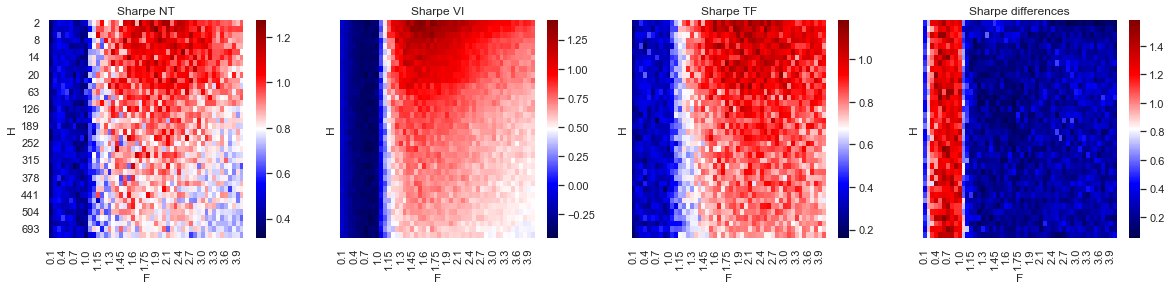

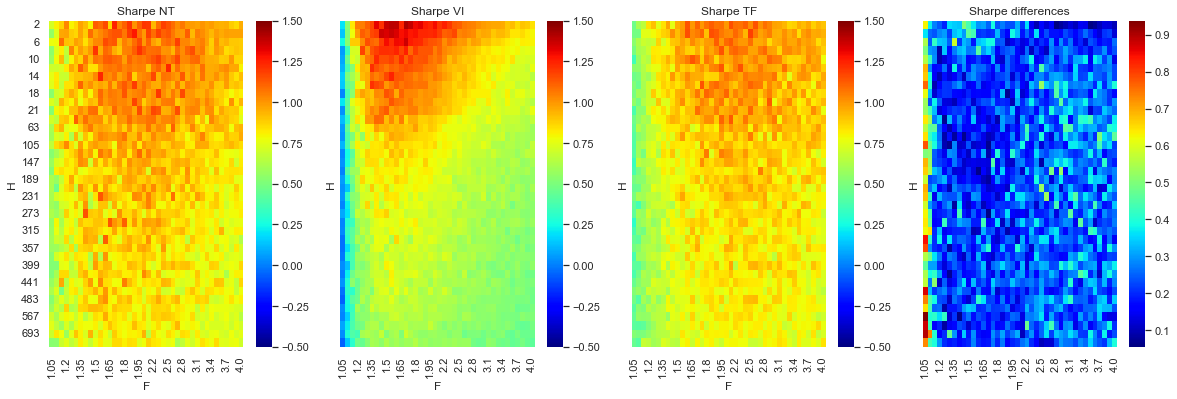

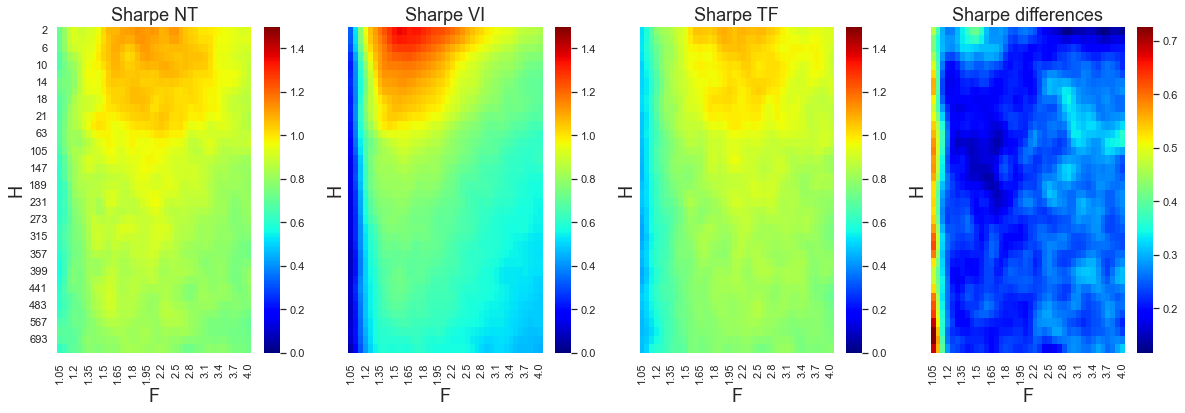

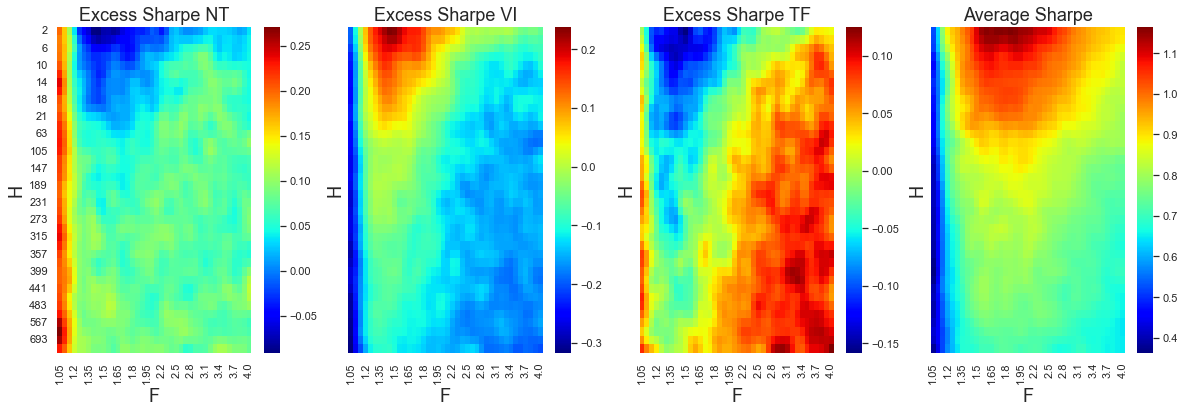

In [254]:
# data_r2 = data.loc[(data['SumDelta'] < 10) & (data['SumDelta'] > 0) & (data['F'] > 1.0)]
data_r2 = data.copy()
data_snt = heat_data(data_r2, 'SharpeNT')
data_svi = heat_data(data_r2, 'SharpeVI')
data_stf = heat_data(data_r2, 'SharpeTF')
data_sdf = heat_data(data_r2, 'DiffSharpes')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20,4), sharey=True, sharex=True)
cmap = 'seismic'
sns.heatmap(data_snt, ax=ax1, cmap = cmap)
sns.heatmap(data_svi, ax=ax2, cmap = cmap)
sns.heatmap(data_stf, ax=ax3, cmap = cmap)
sns.heatmap(data_sdf, ax=ax4, cmap = cmap)
ax1.set_xlabel("F")
ax1.set_ylabel("H")
ax2.set_xlabel("F")
ax2.set_ylabel("H")
ax3.set_xlabel("F")
ax3.set_ylabel("H")
ax4.set_xlabel("F")
ax4.set_ylabel("H")
ax1.set_title("Sharpe NT")
ax2.set_title("Sharpe VI")
ax3.set_title('Sharpe TF')
ax4.set_title("Sharpe differences")
plt.show()

data_r2 = data.loc[(data['F'] > 1.0)]
# data_r2 = data.copy()
data_snt = heat_data(data_r2, 'SharpeNT')
data_svi = heat_data(data_r2, 'SharpeVI')
data_stf = heat_data(data_r2, 'SharpeTF')
data_sdf = heat_data(data_r2, 'DiffSharpes')


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20,6), sharey=True, sharex=True)
cmap = 'jet'
vmin, vmax = -0.5, 1.5
model = sns.heatmap(data_snt, ax=ax1, cmap = cmap, vmin = vmin, vmax = vmax)
sns.heatmap(data_svi, ax=ax2, cmap = cmap, vmin = vmin, vmax = vmax)
sns.heatmap(data_stf, ax=ax3, cmap = cmap, vmin = vmin, vmax = vmax)
sns.heatmap(data_sdf, ax=ax4, cmap = cmap)
ax1.set_xlabel("F")
ax1.set_ylabel("H")
ax2.set_xlabel("F")
ax2.set_ylabel("H")
ax3.set_xlabel("F")
ax3.set_ylabel("H")
ax4.set_xlabel("F")
ax4.set_ylabel("H")
ax1.set_title("Sharpe NT")
ax2.set_title("Sharpe VI")
ax3.set_title('Sharpe TF')
ax4.set_title("Sharpe differences")
plt.show()

data_avg = heat_data(data_r2, 'AvgSharpe')
data_SENT = heat_data(data_r2, 'Sharpe_excess_NT')
data_SEVI = heat_data(data_r2, 'Sharpe_excess_VI')
data_SETF = heat_data(data_r2, 'Sharpe_excess_TF')

sigma = 1
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20,6), sharey=True, sharex=True)
cmap = 'jet'
vmin, vmax = 0, 1.5
sns.heatmap(gaussian_filter(data_snt, sigma=sigma), ax=ax1, cmap = cmap, vmin = vmin, vmax = vmax)
sns.heatmap(gaussian_filter(data_svi, sigma=sigma), ax=ax2, cmap = cmap, vmin = vmin, vmax = vmax)
sns.heatmap(gaussian_filter(data_stf, sigma=sigma), ax=ax3, cmap = cmap, vmin = vmin, vmax = vmax)
sns.heatmap(gaussian_filter(data_sdf, sigma=sigma), ax=ax4, cmap = cmap)
ax1.set_xlabel("F", fontsize=fontsize)
ax1.set_ylabel("H", fontsize=fontsize)
ax2.set_xlabel("F", fontsize=fontsize)
ax2.set_ylabel("H", fontsize=fontsize)
ax3.set_xlabel("F", fontsize=fontsize)
ax3.set_ylabel("H", fontsize=fontsize)
ax4.set_xlabel("F", fontsize=fontsize)
ax4.set_ylabel("H", fontsize=fontsize)
ax1.set_title("Sharpe NT", fontsize=fontsize)
ax2.set_title("Sharpe VI", fontsize=fontsize)
ax3.set_title('Sharpe TF', fontsize=fontsize)
ax4.set_title("Sharpe differences", fontsize=fontsize)
ax1.set_yticklabels(model.get_yticklabels(), rotation = 0)
ax2.set_yticklabels(model.get_yticklabels(), rotation = 0)
ax3.set_yticklabels(model.get_yticklabels(), rotation = 0)
ax1.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax2.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax3.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax4.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax4.set_yticklabels(model.get_yticklabels(), rotation = 0)
plt.savefig('AvgSharpes.png',dpi=300)
plt.show()

sigma = 1
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20,6), sharey=True, sharex=True)
cmap = 'jet'
vmin, vmax = -1.5, 1.5
sns.heatmap(gaussian_filter(data_SENT, sigma=sigma), ax=ax1, cmap = cmap)
sns.heatmap(gaussian_filter(data_SEVI, sigma=sigma), ax=ax2, cmap = cmap)
sns.heatmap(gaussian_filter(data_SETF, sigma=sigma), ax=ax3, cmap = cmap)
sns.heatmap(gaussian_filter(data_avg, sigma=sigma), ax=ax4, cmap = cmap)
ax1.set_xlabel("F", fontsize=fontsize)
ax1.set_ylabel("H", fontsize=fontsize)
ax2.set_xlabel("F", fontsize=fontsize)
ax2.set_ylabel("H", fontsize=fontsize)
ax3.set_xlabel("F", fontsize=fontsize)
ax3.set_ylabel("H", fontsize=fontsize)
ax4.set_xlabel("F", fontsize=fontsize)
ax4.set_ylabel("H", fontsize=fontsize)
ax1.set_title("Excess Sharpe NT", fontsize=fontsize)
ax2.set_title("Excess Sharpe VI", fontsize=fontsize)
ax3.set_title('Excess Sharpe TF', fontsize=fontsize)
ax4.set_title("Average Sharpe", fontsize=fontsize)
ax1.set_yticklabels(model.get_yticklabels(), rotation = 0)
ax2.set_yticklabels(model.get_yticklabels(), rotation = 0)
ax3.set_yticklabels(model.get_yticklabels(), rotation = 0)
ax1.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax2.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax3.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax4.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax4.set_yticklabels(model.get_yticklabels(), rotation = 0)
plt.show()




# TODO: complement with flows

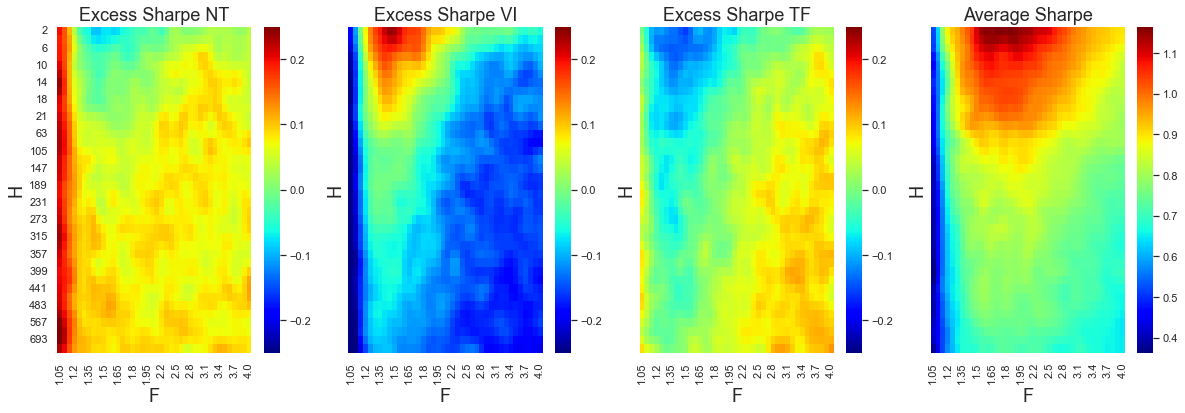

In [253]:
sigma = 1
fontsize = 18
sns.set(font_scale=1) 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20,6), sharey=True, sharex=True)
cmap = 'jet'
vmin, vmax = -0.25, 0.25
sns.heatmap(gaussian_filter(data_SENT, sigma=sigma), ax=ax1, cmap = cmap, vmin= vmin, vmax=vmax)
sns.heatmap(gaussian_filter(data_SEVI, sigma=sigma), ax=ax2, cmap = cmap, vmin= vmin, vmax=vmax)
sns.heatmap(gaussian_filter(data_SETF, sigma=sigma), ax=ax3, cmap = cmap, vmin= vmin, vmax=vmax)
sns.heatmap(gaussian_filter(data_avg, sigma=sigma), ax=ax4, cmap = cmap)
ax1.set_xlabel("F", fontsize=fontsize)
ax1.set_ylabel("H", fontsize=fontsize)
ax2.set_xlabel("F", fontsize=fontsize)
ax2.set_ylabel("H", fontsize=fontsize)
ax3.set_xlabel("F", fontsize=fontsize)
ax3.set_ylabel("H", fontsize=fontsize)
ax4.set_xlabel("F", fontsize=fontsize)
ax4.set_ylabel("H", fontsize=fontsize)
ax1.set_title("Excess Sharpe NT", fontsize=fontsize)
ax2.set_title("Excess Sharpe VI", fontsize=fontsize)
ax3.set_title('Excess Sharpe TF', fontsize=fontsize)
ax4.set_title("Average Sharpe", fontsize=fontsize)
ax1.set_yticklabels(model.get_yticklabels(), rotation = 0)
ax2.set_yticklabels(model.get_yticklabels(), rotation = 0)
ax3.set_yticklabels(model.get_yticklabels(), rotation = 0)
ax1.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax2.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax3.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax4.set_xticklabels(model.get_xticklabels(), rotation = 90)
ax4.set_yticklabels(model.get_yticklabels(), rotation = 0)
plt.savefig('ExcessSharpe.png', dpi=300)
plt.show()

In [267]:
import statsmodels.api as sm

data2 = data.loc[data['F']>1.0]
y = data2['WShare_TF']
X = data2[['SharpeTF', 'SharpeVI', 'SharpeNT', 'F', 'H']]
X = sm.add_constant(X)
model11 = sm.OLS(y, X).fit()
model11.summary()






<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              WShare_TF   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                          1.277e+05
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                        0.00
Time:                        16:50:45   Log-Likelihood:                         -41397.
No. Observations:               15600   AIC:                                  8.280e+04
Df Residuals:                   15595   BIC:                                  8.284e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SharpeTF       3.2001      0.137     23.309      0.000       2.931       3.469
SharpeVI       8.7340      0.124     70.388      0.000       8.491       8.977
SharpeNT       6.4972      0.129     50.207      0.000       6.244       6.751
F              1.7948      0.030     60.379      0.000       1.736       1.853
H              0.0125      0.000    102.284      0.000       0.012       0.013
==============================================================================
Omnibus:                      349.233   Durbin-Watson:                   1.350
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              504.934
Skew:                           0.252   Prob(JB):                    2.26e-110
Kurtosis:                       3.724   Cond. No.                     1.96e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [265]:
y = data['WShare_VI']
X = data[['SharpeTF', 'SharpeVI', 'SharpeNT', 'F', 'H']]
X = sm.add_constant(X)
model11 = sm.OLS(y, X).fit()
model11.summary()

y = data2['WShare_VI']
X = data2[['SharpeTF', 'SharpeVI', 'SharpeNT', 'F', 'H']]
# X = sm.add_constant(X)
model11 = sm.OLS(y, X).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              WShare_VI   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     1395.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:45:56   Log-Likelihood:                -49564.
No. Observations:               15600   AIC:                         9.914e+04
Df Residuals:                   15594   BIC:                         9.919e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.9521      0.269    219.296      0.000      58.425      59.479
SharpeTF     -16.0603      0.241    -66.609      0.000     -16.533     -15.588
SharpeVI      -3.6000      0.233    -15.444      0.000      -4.057      -3.143
SharpeNT       5.1755      0.225     22.989      0.000       4.734       5.617
F             -1.3521      0.055    -24.626      0.000      -1.460      -1.244
H             -0.0059      0.000    -23.663      0.000      -0.006      -0.005
==============================================================================
Omnibus:                      116.579   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.652
Skew:                           0.025   Prob(JB):                     5.91e-40
Kurtosis:                       3.525   Cond. No.                     2.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [266]:
y = data['WShare_NT']
X = data[['SharpeTF', 'SharpeVI', 'SharpeNT', 'F', 'H']]
X = sm.add_constant(X)
model11 = sm.OLS(y, X).fit()
model11.summary()

y = data2['WShare_NT']
X = data2[['SharpeTF', 'SharpeVI', 'SharpeNT', 'F', 'H']]
X = sm.add_constant(X)
model11 = sm.OLS(y, X).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              WShare_NT   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     967.2
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:46:11   Log-Likelihood:                -50187.
No. Observations:               15600   AIC:                         1.004e+05
Df Residuals:                   15594   BIC:                         1.004e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.7498      0.280    109.905      0.000      30.201      31.298
SharpeTF      15.4113      0.251     61.413      0.000      14.919      15.903
SharpeVI      -1.2147      0.243     -5.007      0.000      -1.690      -0.739
SharpeNT      -9.5860      0.234    -40.912      0.000     -10.045      -9.127
F              0.4113      0.057      7.197      0.000       0.299       0.523
H             -0.0011      0.000     -4.107      0.000      -0.002      -0.001
==============================================================================
Omnibus:                      991.121   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1459.631
Skew:                           0.542   Prob(JB):                         0.00
Kurtosis:                       4.034   Cond. No.                     2.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [271]:
data2 = data.loc[data['F']>1.0]
y = data2['WShare_TF']
X = data2[['WShare_NT', 'SharpeTF', 'WShare_VI', 'SharpeVI', 'SharpeNT', 'F', 'H']]
X = sm.add_constant(X)
model11 = sm.OLS(y, X).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              WShare_TF   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.160e+28
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:53:45   Log-Likelihood:             4.1587e+05
No. Observations:               15600   AIC:                        -8.317e+05
Df Residuals:                   15592   BIC:                        -8.317e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.0000   1.61e-13   6.21e+14      0.000     100.000     100.000
WShare_NT     -1.0000   1.77e-15  -5.65e+14      0.000      -1.000      -1.000
SharpeTF   -2.331e-14   3.02e-14     -0.773      0.440   -8.24e-14    3.58e-14
WShare_VI     -1.0000   1.84e-15  -5.43e+14      0.000      -1.000      -1.000
SharpeVI    1.665e-16   2.71e-14      0.006      0.995    -5.3e-14    5.33e-14
SharpeNT   -4.885e-15   2.67e-14     -0.183      0.855   -5.72e-14    4.74e-14
F           7.598e-15   6.34e-15      1.198      0.231   -4.83e-15       2e-14
H          -1.707e-15   3.04e-17    -56.065      0.000   -1.77e-15   -1.65e-15
==============================================================================
Omnibus:                     1655.705   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1144.327
Skew:                           0.553   Prob(JB):                    3.25e-249
Kurtosis:                       2.268   Cond. No.                     1.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""